In [424]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import plotly.express as px

In [425]:
#import csv and read in data
passenger_df = pd.read_csv("../Data_Project/combined.csv", index_col=False)
passenger_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [472]:
#Find correlation between features
df_corr = passenger_df.corr()
df_corr

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005524 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.005524  1.000000 -0.306273 -0.047579 -0.019493  0.082284   
Pclass         -0.038354 -0.306273  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.047579 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224 -0.019493  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.082284  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.247184 -0.558629  0.178740  0.160238  0.221539   
Family         -0.031437  0.032152  0.050027 -0.240229  0.861952  0.792296   

                 Fare    Family  
PassengerId  0.031428 -0.031437  
Survived     0.247184  0.032152  
Pclass      -0.558629  0.050027  
Age          0.178740 -0.240229  
SibSp        0.160238  0.861952  
Parch        0.221539  0.792296  
Fare         1.000000  0.226492  
Family       0.226492  1.000000

<AxesSubplot:>

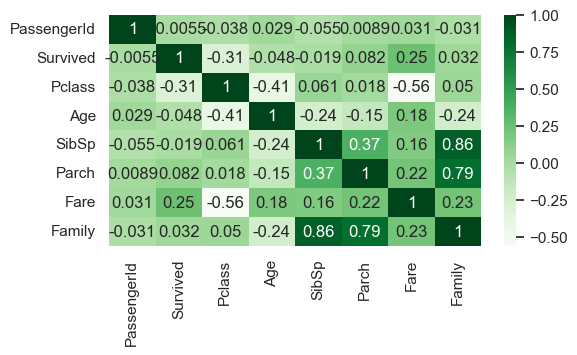

In [474]:
#Create heatmap to display correlation of all features
colormap = plt.cm.Greens
plt.figure(figsize=(6,3))
sns.heatmap(passenger_df.corr(), cmap=colormap, annot=True)

In [426]:
#Drop Cabin and Ticket number columns
passenger_df = passenger_df.drop(['Cabin','Ticket'], axis=1)
passenger_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  
0      0   7.2500        S  
1      0  71.2833        C  
2      0   7.9250        S  
3      0  53.1000        S  
4      0   8.0500        S

In [427]:
#Combine SibSP and Parch into new column 'Family'
passenger_df['Family'] = passenger_df['SibSp'] + passenger_df['Parch']
passenger_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Family  
0      0   7.2500        S       1  
1      0  71.2833        C       1  
2      0   7.9250        S       0  
3      0  53.1000        S       1  
4      0   8.0500        S       0

In [428]:
#Drop Name, Fare, Embark ID
new_passenger_df = passenger_df.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Fare', 'Embarked'], axis=1)
new_passenger_df.head()

Survived  Pclass     Sex   Age  Family
0         0       3    male  22.0       1
1         1       1  female  38.0       1
2         1       3  female  26.0       0
3         1       1  female  35.0       1
4         0       3    male  35.0       0

In [429]:
# saving the dataframe
new_passenger_df.to_csv('new_passenger_df.csv')

In [430]:
new_passenger_df.describe()

Survived       Pclass          Age       Family
count  1309.000000  1309.000000  1046.000000  1309.000000
mean      0.384263     2.294882    29.881138     0.883881
std       0.486606     0.837836    14.413493     1.583639
min       0.000000     1.000000     0.170000     0.000000
25%       0.000000     2.000000    21.000000     0.000000
50%       0.000000     3.000000    28.000000     0.000000
75%       1.000000     3.000000    39.000000     1.000000
max       1.000000     3.000000    80.000000    10.000000

In [431]:
features=list(new_passenger_df.columns)
features.remove('Survived')
X=new_passenger_df[features]
X['Age']=X['Age'].fillna(0)
y=new_passenger_df['Survived']
print(X.shape)
print(y.shape)

(1309, 4)
(1309,)


C:\Users\koryk\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [432]:
sex_df=pd.get_dummies(X['Sex'], drop_first=True)
#embarked_df=pd.get_dummies(X['Embarked'])
X=pd.concat([X, sex_df], axis=1)
X=X.drop(columns=['Sex'])
X.head()

Pclass   Age  Family  male
0       3  22.0       1     1
1       1  38.0       1     0
2       3  26.0       0     0
3       1  35.0       1     0
4       3  35.0       0     1

In [433]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(981, 4)
(981,)
(328, 4)
(328,)


In [434]:
X_train.head()

Pclass   Age  Family  male
1061       3   0.0       0     1
388        3   0.0       0     1
637        2  31.0       2     1
652        3  21.0       0     1
653        3   0.0       0     0

In [435]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Logistic Regression Classifier

In [471]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
Y_pred = logreg.predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       204
           1       0.75      0.67      0.71       124

    accuracy                           0.79       328
   macro avg       0.78      0.77      0.77       328
weighted avg       0.79      0.79      0.79       328



# Random Forest Classifier

In [436]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=0)
rf.fit(X_train_scaled, y_train)
print(f'Train Score: {rf.score(X_train_scaled, y_train):.3f}')
print(f'Test Score: {rf.score(X_test_scaled, y_test):.3f}')

Train Score: 0.879
Test Score: 0.774


In [437]:
sorted(list(zip(rf.feature_importances_, X_train.columns)), reverse=True)

[(0.3998380751949316, 'Age'),
 (0.32696221671723086, 'male'),
 (0.15014052626833477, 'Pclass'),
 (0.12305918181950289, 'Family')]

# Decision Tree Classifier

In [438]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [439]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier(random_state=0)
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

In [440]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)

In [441]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

In [442]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Victim", "Actual Survivor"], columns=["Predicted Victim", "Predicted Survivor"])

print("Confusion Matrix")
cm_df

Confusion Matrix


Predicted Victim  Predicted Survivor
Actual Victim                 181                  23
Actual Survivor                51                  73

In [443]:
# Displaying results

print(f"Accuracy Score : {rf.score(X_test_scaled, y_test):.2f}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.77
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       204
           1       0.76      0.59      0.66       124

    accuracy                           0.77       328
   macro avg       0.77      0.74      0.75       328
weighted avg       0.77      0.77      0.77       328



In [444]:
#features_df = new_passenger_df.drop(['Sur'], axis=1)
feature_columns = X_train.columns
feature_columns

Index(['Pclass', 'Age', 'Family', 'male'], dtype='object')

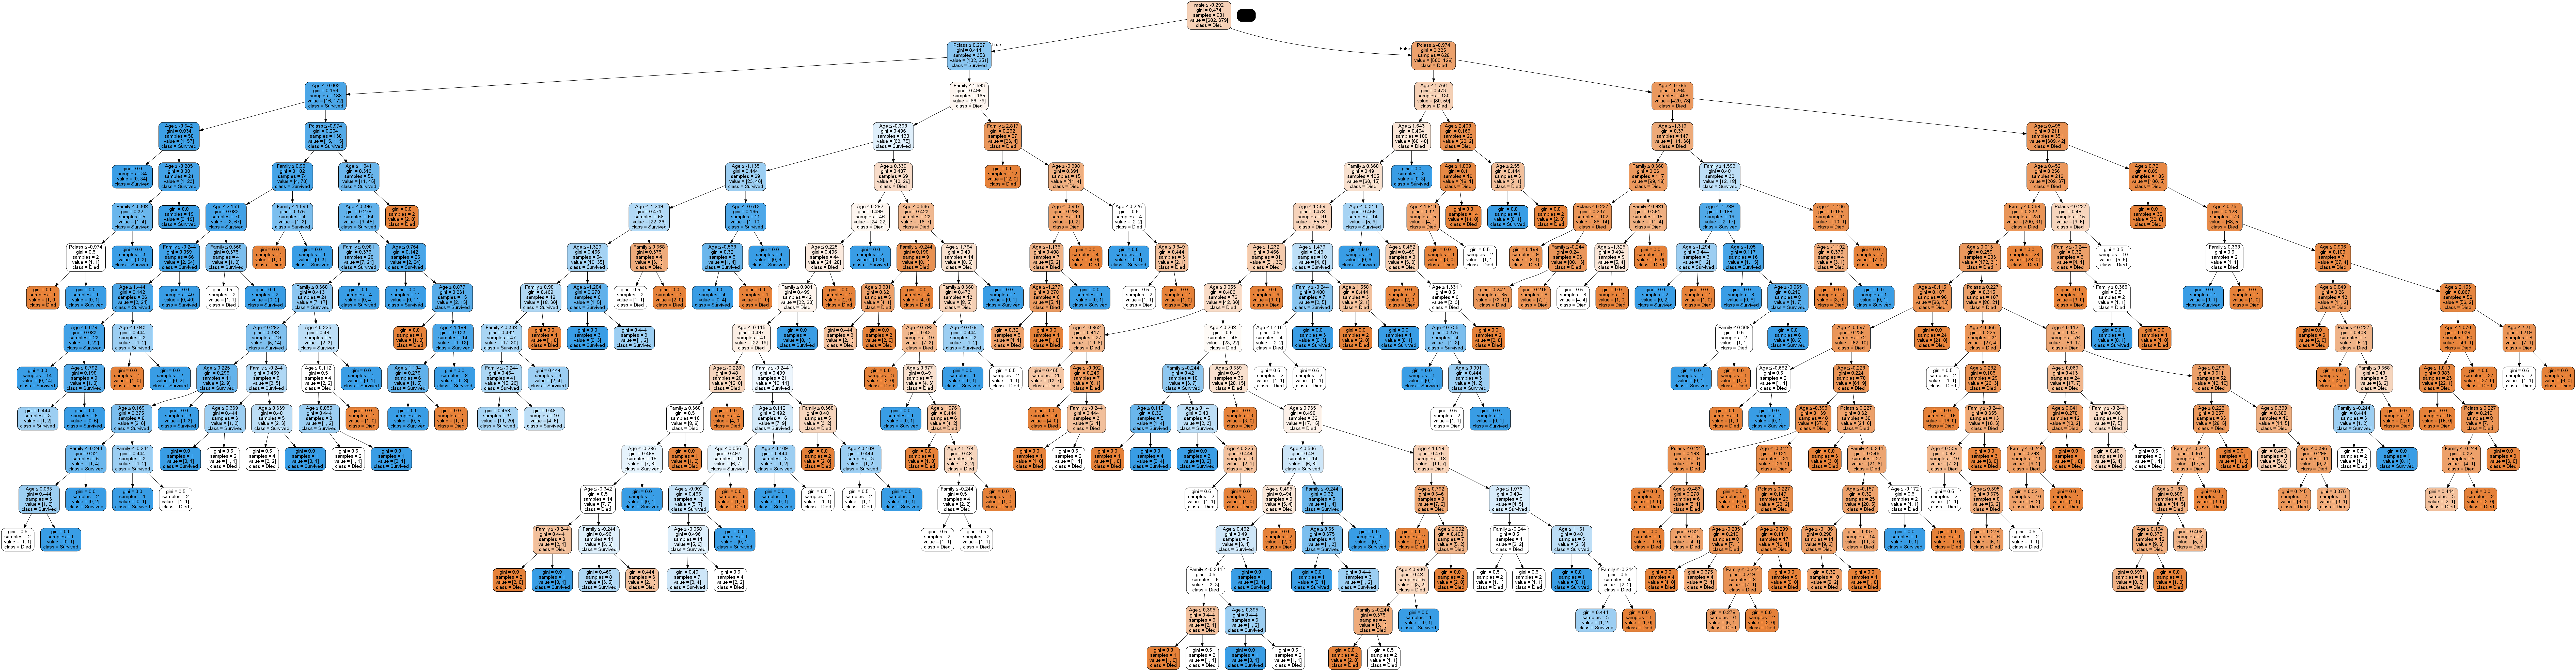

In [445]:
#Decision Tree Visualisation
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True, feature_names=feature_columns, special_characters=True, class_names=['Died','Survived'])
#
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Titanic.png')
Image(graph.create_png())

In [446]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

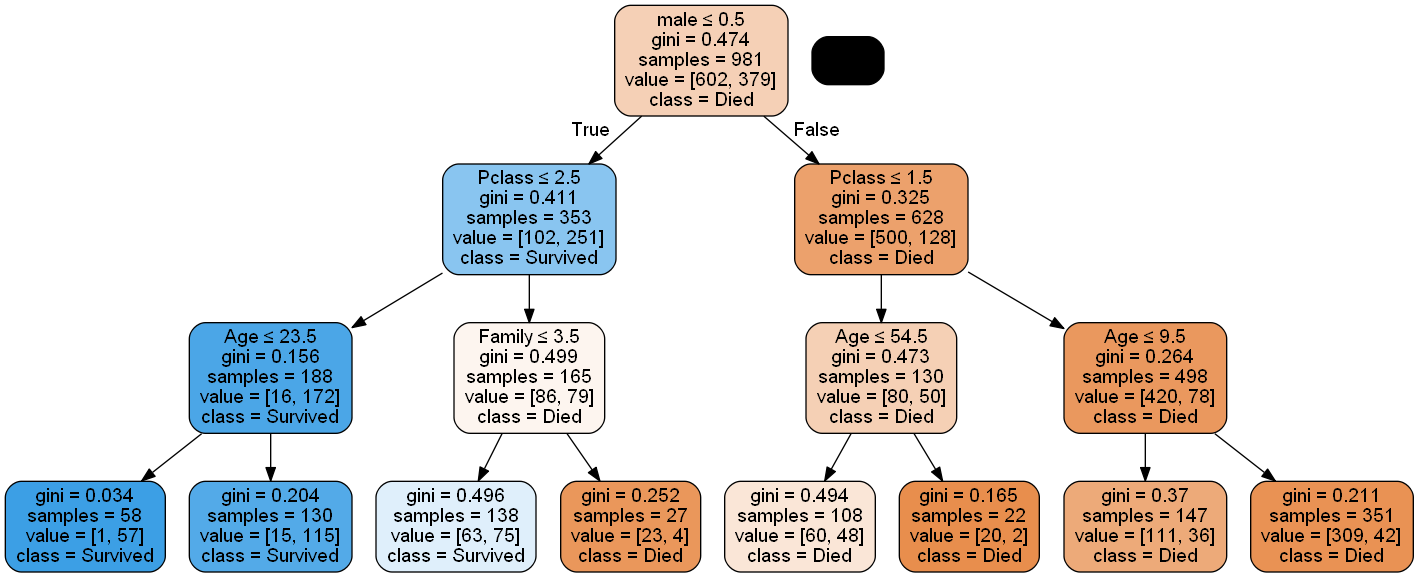

In [447]:
#Better Decision Tree Visualisation
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = feature_columns,class_names=['Died','Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Titanic_condensed.png')
Image(graph.create_png())

In [448]:
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=list(X_train))
print(tree_rules)

|--- male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 23.50
|   |   |   |--- class: 1
|   |   |--- Age >  23.50
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Family <= 3.50
|   |   |   |--- class: 1
|   |   |--- Family >  3.50
|   |   |   |--- class: 0
|--- male >  0.50
|   |--- Pclass <= 1.50
|   |   |--- Age <= 54.50
|   |   |   |--- class: 0
|   |   |--- Age >  54.50
|   |   |   |--- class: 0
|   |--- Pclass >  1.50
|   |   |--- Age <= 9.50
|   |   |   |--- class: 0
|   |   |--- Age >  9.50
|   |   |   |--- class: 0



In [449]:
clf.score(X_train, y_train)

C:\Users\koryk\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



0.7849133537206932

# Neural Network Model

In [450]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
import tensorflow as tf
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                50        
                                                                 
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [451]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [452]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [453]:
# Train the model
# Create a callback that saves the model's weights every 5 epoch's
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)


fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
31/31 [==============================] - 1s 2ms/step - loss: 0.6621 - accuracy: 0.5953
Epoch 2/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.6993
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.7411
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.7737
Epoch 5/50
25/31 [=======================>......] - ETA: 0s - loss: 0.5427 - accuracy: 0.7775
Epoch 5: saving model to checkpoints\weights.05.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7849
Epoch 6/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7839
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7829
Epoch 8/50
31/31 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7870
Epoch 9/50
31/31 [==============================] - 0s 2ms/step - loss: 0.4853 -

In [454]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 0.4562 - accuracy: 0.7957 - 190ms/epoch - 17ms/step
Loss: 0.4562378525733948, Accuracy: 0.7957317233085632


In [455]:

new_passenger_df.hvplot.scatter(x="Age", y="Survived", title="Survival Breakdown by Age and Class", by="Pclass")


:NdOverlay   [Pclass]
   :Scatter   [Age]   (Survived)

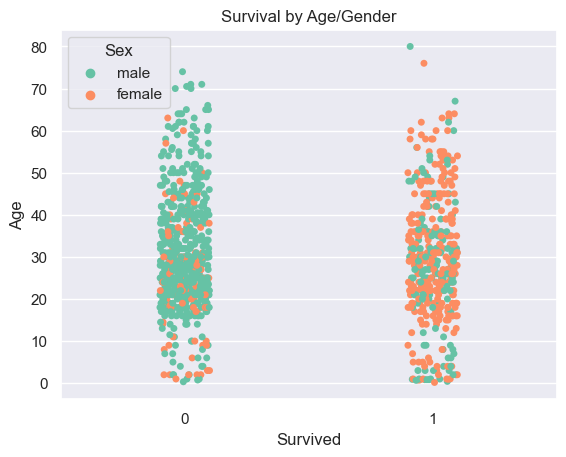

In [456]:
#sns.stripplot(data=new_passenger_df, x='Sex', y='Age', hue='Survived')
chart = sns.stripplot(data=new_passenger_df, x='Survived', y='Age', hue='Sex')

#plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
chart.set_title('Survival by Age/Gender')

plt.show()

In [457]:
new_passenger_df.hvplot.scatter(x="Age", y="Family", title="Passenger Breakdown by Age, Family Members, and Class", by="Pclass")

:NdOverlay   [Pclass]
   :Scatter   [Age]   (Family)

<AxesSubplot:title={'center':'Survival Breakdown by Class'}, xlabel='Survived', ylabel='Passenger Count'>

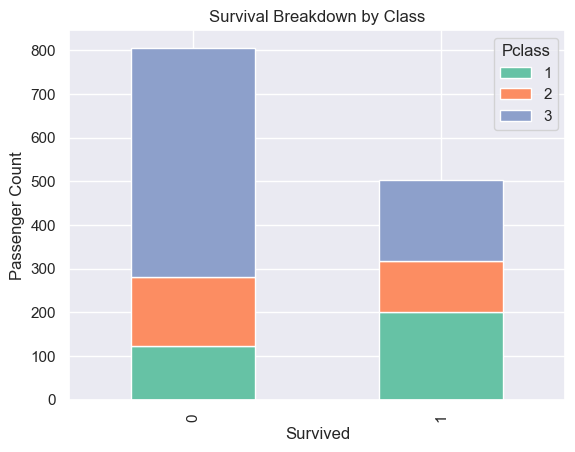

In [458]:
# Stacked Bar Chart, grouped by Pclass and Survival
new_passenger_df_plot = new_passenger_df.groupby(['Pclass', 'Survived']).size().reset_index().pivot(columns='Pclass', index='Survived', values=0)
new_passenger_df_plot.plot(kind='bar', ylabel="Passenger Count", title='Survival Breakdown by Class', stacked=True)


Text(0.5, 1.0, 'Survival Breakdown by Gender')

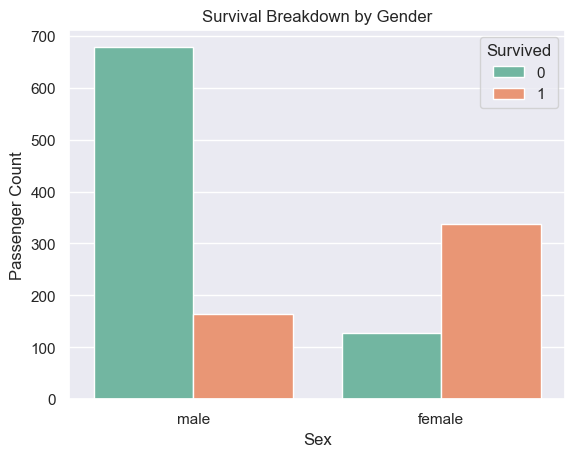

In [459]:
# Count plot
#https://datagy.io/seaborn-countplot/
sns.countplot(data = new_passenger_df, x ="Sex", hue ="Survived")
plt.ylabel("Passenger Count")
plt.title("Survival Breakdown by Gender")

In [460]:
#Create 3D plot
fig = px.scatter_3d(
    new_passenger_df,
    x="Age",
    y="Pclass",
    z="Sex",
    color="Survived",
    symbol="Survived",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [461]:
#Find correlation between features
corr = new_passenger_df.corr()
corr

Survived    Pclass       Age    Family
Survived  1.000000 -0.306273 -0.047579  0.032152
Pclass   -0.306273  1.000000 -0.408106  0.050027
Age      -0.047579 -0.408106  1.000000 -0.240229
Family    0.032152  0.050027 -0.240229  1.000000

<AxesSubplot:>

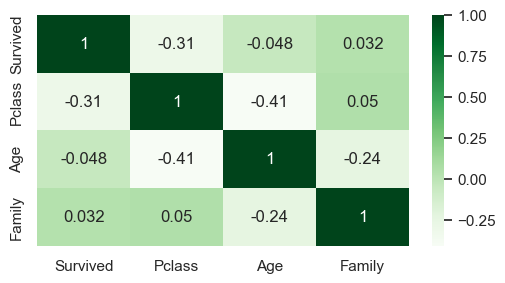

In [462]:
#Create heatmap to display correlation of features
colormap = plt.cm.Greens
plt.figure(figsize=(6,3))
sns.heatmap(new_passenger_df.corr(), cmap=colormap, annot=True)

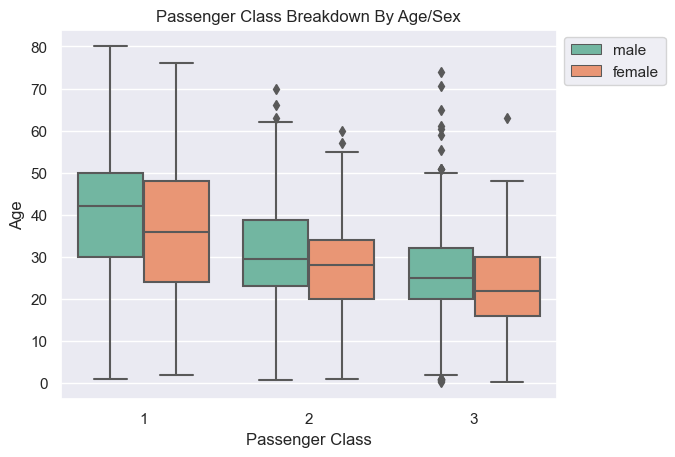

In [463]:
#Boxplot
#https://datagy.io/seaborn-boxplot/
# Creating our first boxplot

sns.set_style('darkgrid')
sns.set_palette('Set2')

#Split by sex
sns.boxplot(data=new_passenger_df, x='Pclass', y='Age', hue='Sex')

#Sex grouped
#sns.boxplot(data=new_passenger_df, x='Pclass', y='Age')

plt.title('Passenger Class Breakdown By Age/Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()